<a href="https://colab.research.google.com/github/faisaladisoe/image-processing-lab/blob/master/Lab%206/source%20code/Lab6_1906293184_MuhammadFaisalAdiSoesatyo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [26]:
import os
import cv2 as cv
import numpy as np
import statistics as stats
from numpy import array, zeros
from matplotlib import pyplot as plt
from skimage.morphology import disk, ball
from skimage import color, io, filters, util, segmentation, exposure

# Image Histogram

## Classification Logic

### Import images

In [31]:
emerald_image_1 = io.imread('./images/Histogram/emerald/emerald1.jpg')
ruby_image_1 = io.imread('./images/Histogram/ruby/ruby1.jpg')

### Show histogram of emerald and ruby

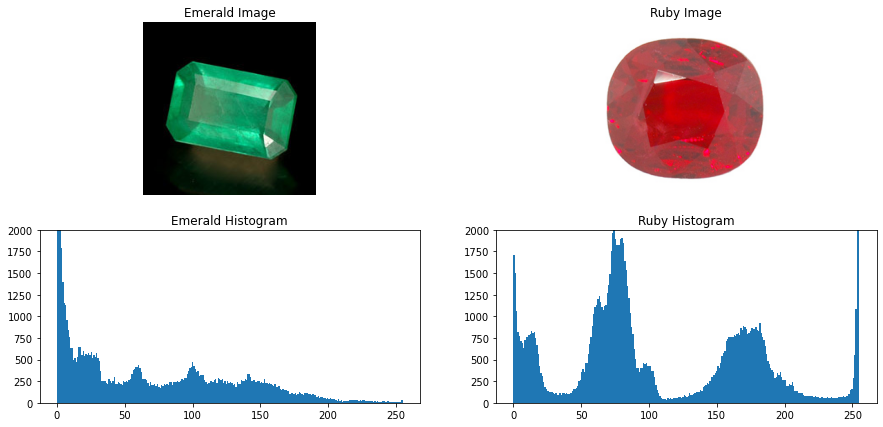

In [32]:
# Show image
plt.figure(figsize=(15,7))
plt.subplot(2, 2, 1)
plt.title('Emerald Image')
plt.imshow(emerald_image_1)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.title('Ruby Image')
plt.imshow(ruby_image_1)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Emerald Histogram')
plt.hist(emerald_image_1.flatten(), 256, range=(0,255))
plt.ylim([0, 2e3]); #plt.axis('off')
plt.subplot(2, 2, 4)
plt.title('Ruby Histogram')
plt.hist(ruby_image_1.flatten(), 256, range=(0,255))
plt.ylim([0, 2e3]); #plt.axis('off')

plt.show()

### Prediction

In [35]:
def predict(file_name):
  img = io.imread(file_name)
  frequency_count = np.bincount(img.flatten())
  cum_sum = np.cumsum(frequency_count)

  mean_50_100 = stats.mean(frequency_count[50:100])
  mean_150_200 = stats.mean(frequency_count[150:200])
  if stats.mean(frequency_count[50:200]) >= 750:
    return 'emerald'
  elif mean_50_100 >= 750 or mean_150_200 >= 500:
    return 'ruby'
  else:
    return 'emerald'

### Execution

In [34]:
folders = ['emerald', 'ruby']
for folder in folders:
  for filename in os.listdir(f'./images/Histogram/{folder}'):
    abs_path_folder = f'./images/Histogram/{folder}'
    filename = f'{abs_path_folder}/{filename}'
    print(f'image {filename} predicted as {predict(filename)}')

image ./images/Histogram/emerald/emerald2.jpg predicted as emerald
image ./images/Histogram/emerald/emerald4.jpg predicted as emerald
image ./images/Histogram/emerald/emerald3.jpg predicted as emerald
image ./images/Histogram/emerald/emerald1.jpg predicted as emerald
image ./images/Histogram/ruby/ruby3.jpg predicted as emerald
image ./images/Histogram/ruby/ruby4.jpg predicted as ruby
image ./images/Histogram/ruby/ruby1.jpg predicted as ruby
image ./images/Histogram/ruby/ruby2.jpg predicted as ruby


## Explanation

Pada nomor 1 saya memilih menggunakan rata-rata dari rentang frekuensi tertentu. Dalam hal ini rata-rata frekuensi dari rentang 50 hingga 100 serta rentang 150 hingga 200. 

Saya memilih rentang tersebut karena terdapat kecenderungan sebagai berikut


*   Benda Emerald, memiliki dua buah kecenderungan entah itu tersebar merata dalam frekuensi yang rendah atau tinggi. Kedua kasus tersebut terdapat pada masalah ini. Dideteksi terdapat dua buah image emerald dengan persebaran frekuensi tinggi juga rendah. Namun keempatnya memiliki satu kesamaan, yakni tersebar di rentang yang lebar. Dalam kasus ini 50 hingga 200. Dari hasil pengamatan berikut, disimpulkan bahwa apabila terdapat persebarang frekuensi berjumlah tinggi pada rentang 50 hingga 200 atau frekuensi rendah kurang dari 500 maka dapat dideteksi sebagai benda emerald.
*   Benda Ruby, memiliki karakterisik unik yakni kemunculan frekuensi tinggi hanya ada pada rentang-rentang tertentu. Kemunculan frekuensi tinggi tersebut terlihat seolah-olah seperti impuls (muncul mendadak kemudian melandai kembali). Dalam kasus ini frekuensi tinggi muncul pada rentang 50 hingga 100 serta 150 hingga 200. Terdapat satu buah outlier, yakni frekuensi tinggi pada rentang 20 hingga 70. Dengan demikian kasus dapat ditangani bahwa apabila pada rentang 50 hingga 100 dan 150 hingga 200 rata-rata frekuensi yang muncul masing-masing di atas 750 dan 500 maka dapat digolongkan sebagai benda ruby.

Dari method di atas, maka metric recall yang saya peroleh adalah 87.5% dengan 1 kesalahan pada image ruby nomor 3.



# Hough Transform

## Classify the result of Hough Transform

## Explanation

# Template Matching

## Result of template matching

## Difference

## Benefit & Drawback